### Numerical Methods Term Paper

# Existence of Repulsive Induced Charge and Solution of 2D Laplace's Equation. 

Mohammad Saif Khan

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit as cf
import numba
from numba import jit

In [3]:
R=1
q=1

def pot(z):
    a=R+z+np.sqrt(np.square(R)+np.square(z))
    b=1+(z/np.sqrt(np.square(R)+np.square(z)))
    c=2-np.square(2*R/a)
    d=c/b
    return (q**2)*np.log(d)

def curve(z,a,b):
    return (a/z)+b*np.log(z/(0.5+z))

In [4]:
z=np.linspace(-0.3,6,100)
z2=np.linspace(0.2,6,100)

In [5]:
res,cov=cf(curve,z2,pot(z2))
res

array([0.04926403, 0.18803111])

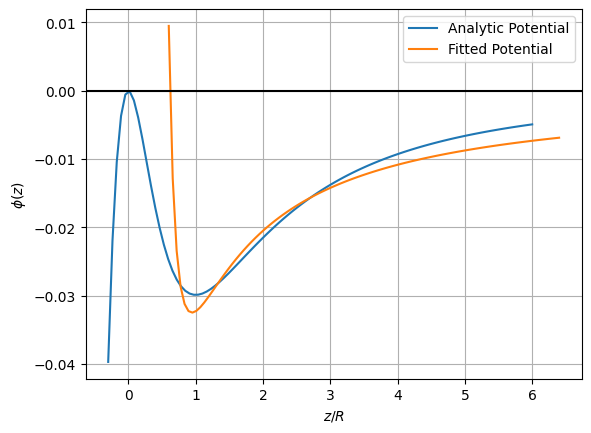

In [6]:
plt.plot(z/R,pot(z))
plt.plot(0.4+z2/R,curve(z2,0.049,0.188))
plt.grid()
#plt.ylim(-0.02,0.01)
plt.xlabel("$z/R$")
plt.ylabel("$\phi(z)$")
plt.legend(["Analytic Potential","Fitted Potential"])
plt.axhline(0, color='black')

In [7]:
def fd(x,h):
    der1=[]
    for i in range(len(x)):
        if i==0:
            der=(pot(x[i+1])-pot(x[i]))/h # Forward Diff.
            der1.append(der)
        elif i<=len(x)-2:
            der=(pot(x[i+1])-pot(x[i-1]))/(2*h) # Central Diff.
            der1.append(der)
        elif i==len(x)-1:
            der=(pot(x[i])-pot(x[i-1]))/h # Backward Diff.
            der1.append(der)
    return np.array(der1)

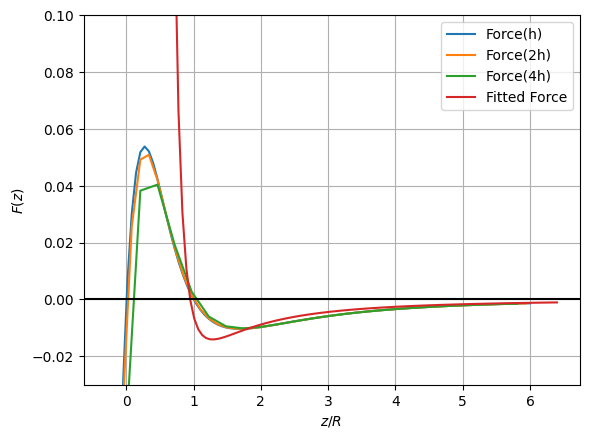

In [8]:
plt.plot(z/R,-fd(z,z[1]-z[0]))
plt.plot(z[::2]/R,-fd(z[::2],2*(z[1]-z[0])))
plt.plot(z[::4]/R,-fd(z[::4],4*(z[1]-z[0])))
plt.plot(0.4+z2/R,-np.gradient(curve(z2,0.049,0.188),z2))
plt.ylim(-0.03,0.1)
plt.grid()
plt.xlabel("$z/R$")
plt.ylabel("$F(z)$")
plt.legend(["Force(h)", "Force(2h)", "Force(4h)", "Fitted Force"])
plt.axhline(0,color="black")

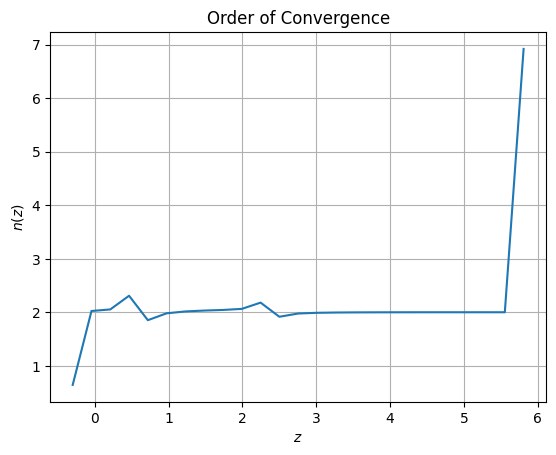

In [9]:
b=fd(z[::2],2*(z[1]-z[0]))[::2]-fd(z,z[1]-z[0])[::4]
a=fd(z[::4],4*(z[1]-z[0]))-fd(z[::2],2*(z[1]-z[0]))[::2]
l=np.divide(a,b)
nx=np.log2(np.abs(l)) # Order of Convergence
plt.plot(z[::4],nx)
plt.xlabel("$z$")
plt.ylabel("$n(z)$")
plt.title("Order of Convergence")
plt.grid()

In [10]:
edge = np.linspace(-1.5, 1.5, 400)
xv, yv = np.meshgrid(edge, edge)

R=0.5
def pot2(z):
    q=1
    a=R+z+np.sqrt(np.square(R)+np.square(z))
    b=1+(z/np.sqrt(np.square(R)+np.square(z)))
    c=2-np.square(2*R/a)
    d=c/b
    return (q**2/2)*np.log(d)

def potential_block1(x,y,r):
    return np.select([(x**2+(y-r)**2<0.0001)],[1])

def circle(x,y,r):
    return np.select([(x**2+y**2>0.25)*(x**2+y**2<0.26)*(y<0)],[1e2*pot2(r)])

def potential_block(x,y,r):
    return circle(x,y,r)+potential_block1(x,y,r)

@numba.jit("f8[:,:](f8[:,:], b1[:,:], i8)", nopython=True, nogil=True)
def compute_potential(potential, fixed_bool, n_iter):
    length = len(potential[0])
    for n in range(n_iter):
        for i in range(1, length-1):
            for j in range(1, length-1):
                if not(fixed_bool[j][i]):
                    potential[j][i] = 1/4 * (potential[j+1][i] + potential[j-1][i] + potential[j][i+1] + potential[j][i-1])
    return potential

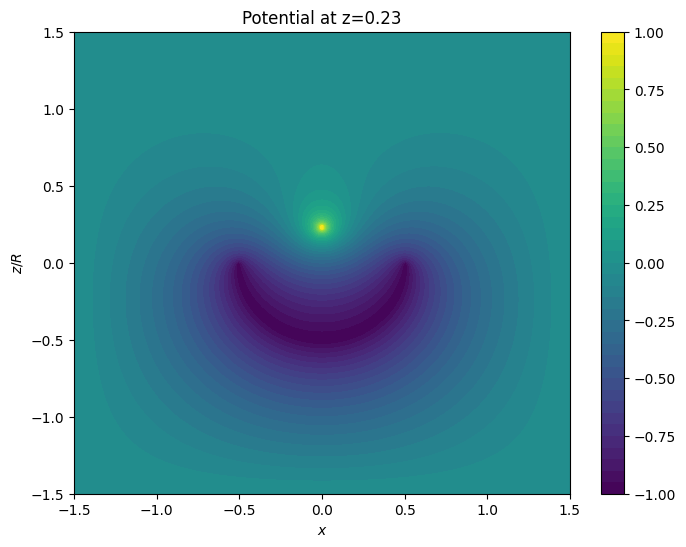

In [11]:
r=0.23
fixed = potential_block(xv,yv,r)
fixed_bool = fixed!=0

potential = np.zeros((400,400))
potential[fixed_bool] = fixed[fixed_bool]
potential = compute_potential(potential, fixed_bool, n_iter=10000)

fig, ax = plt.subplots(1, 1, figsize=(8,6))
clr_plot = ax.contourf(xv,yv,potential,40)
ax.set_xlabel('$x$')
ax.set_ylabel('$z/R$')
fig.colorbar(clr_plot)
ax.set_title(f'Potential at z={r}')


plt.show()

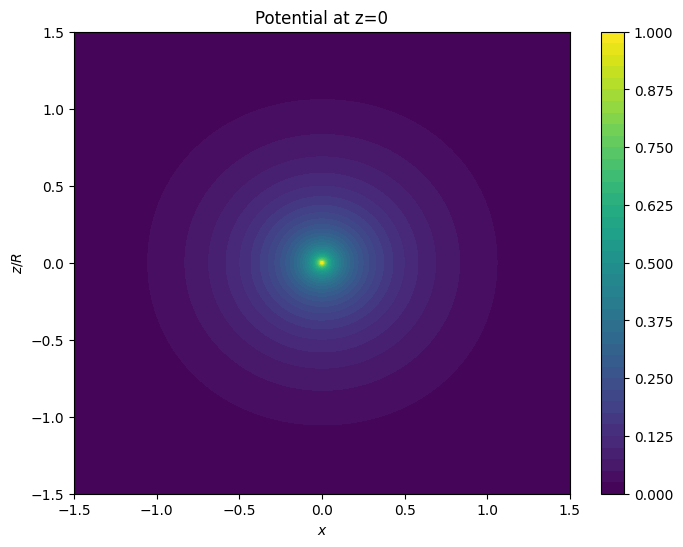

In [12]:
r=0
fixed = potential_block(xv,yv,r)
fixed_bool = fixed!=0

potential = np.zeros((400,400))
potential[fixed_bool] = fixed[fixed_bool]
potential = compute_potential(potential, fixed_bool, n_iter=10000)

fig, ax = plt.subplots(1, 1, figsize=(8,6))
clr_plot = ax.contourf(xv,yv,potential,40)
ax.set_xlabel('$x$')
ax.set_ylabel('$z/R$')
fig.colorbar(clr_plot)
ax.set_title(f'Potential at z={r}')


plt.show()

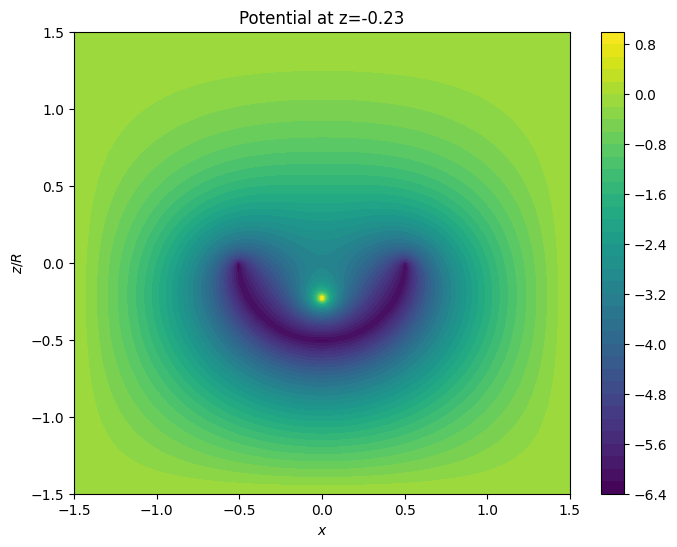

In [13]:
r=-0.23
fixed = potential_block(xv,yv,r)
fixed_bool = fixed!=0

potential = np.zeros((400,400))
potential[fixed_bool] = fixed[fixed_bool]
potential = compute_potential(potential, fixed_bool, n_iter=10000)

fig, ax = plt.subplots(1, 1, figsize=(8,6))
clr_plot = ax.contourf(xv,yv,potential,40)
ax.set_xlabel('$x$')
ax.set_ylabel('$z/R$')
fig.colorbar(clr_plot)
ax.set_title(f'Potential at z={r}')


plt.show()

In [14]:
def laplace(N):
    e = np.linspace(-1.5, 1.5, N)
    x, y = np.meshgrid(e, e)

    r=0
    fixed = potential_block(x,y,r)
    fixed_bool = fixed!=0

    potential = np.zeros((N,N))
    potential[fixed_bool] = fixed[fixed_bool]
    potential = compute_potential(potential, fixed_bool, n_iter=10000)
    a=int(N/2)
    
    
#     fig, ax = plt.subplots(1, 1, figsize=(8,6))
#     clr_plot = ax.contourf(x,y,potential,40)
#     ax.set_xlabel('$x$')
#     ax.set_ylabel('$z/R$')
#     fig.colorbar(clr_plot)
#     ax.set_title(f'Potential at z={r}')


#     plt.show()
    
    return potential[a]

In [15]:
L2=laplace(200)  #total points 200x200

In [16]:
L4=laplace(400) #total points 800x800

In [17]:
L8=laplace(800) #total points 800x800

In [18]:
L16=laplace(1600) #total points 1600x1600

In [19]:
y=np.linspace(-1.5,1.5,1600)
E1=np.abs(L4[::2]-L2)
E2=np.abs(L8[::2]-L4)
E3=np.abs(L16[::2]-L8)

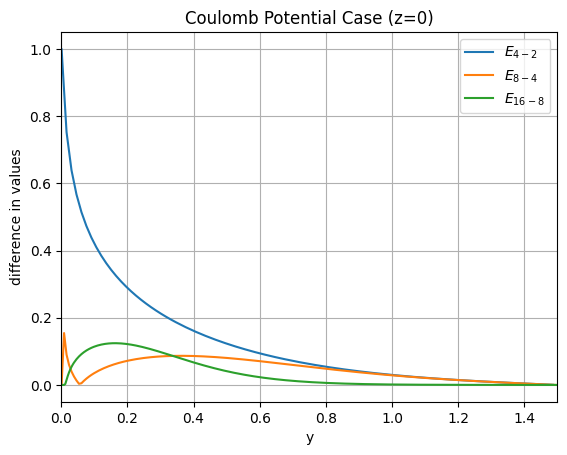

In [20]:
plt.plot(y[::8],(E1))
plt.plot(y[::4],(E2))
plt.plot(y[::2],(E3))
plt.xlim(0,1.5)     #only half the values matter cause rest half is symmetric for r=0
plt.grid()
plt.legend([r"$E_{4-2}$",r"$E_{8-4}$",r"$E_{16-8}$"])
plt.title("Coulomb Potential Case (z=0)")
plt.xlabel("y")
plt.ylabel("difference in values")

plt.savefig("error.png")